## Data Set Description
The datasets contains 5 sheets, each of which contains a year worth of data from 11 sensors. The way they calculate each datapoint is by averaging the sensor readings every hour. <br />
<br />
The response that we are interest in are Carbon monoxide (CO) and Nitrogen oxides (NOX) which are in a range of values, a regression problem.<br />
<br />
We are interested in predicting both the CO and NOX. We will create a model prediction seperately for both the CO and NOX. We will create a two seperate dataset containing only one response each.<br />
Since there a many datasets (37,000) and only 9 features, we do not need to eliminate any features from our model.<br />

### Importing Dataset

In [1]:
from IPython.core.interactiveshell import InteractiveShell
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('dark_background')

InteractiveShell.ast_node_interactivity = "all"

# read in the datasets
df_2011 = pd.read_csv('gt_2011.csv')
df_2012 = pd.read_csv('gt_2012.csv')
df_2013 = pd.read_csv('gt_2013.csv')
df_2014 = pd.read_csv('gt_2014.csv')
df_2015 = pd.read_csv('gt_2015.csv')

# grouping the entire dataset for visualization
df_raw = pd.concat([df_2011, df_2012, df_2013, df_2014, df_2015])

df_raw.head()
df_raw.shape

(36733, 11)

### Proper Dataframe Setup

dataset for CO: 'df_co'<br />
dataset for NOX: 'df_nox'<br />
dataset with only input: 'x_raw'<br />
dataset with only 'CO' output: 'y_co_raw'<br />
dataset with only 'NOX' output: 'y_nox_raw'<br />

In [2]:
# removing any datasets with no data.
df_raw.dropna()
df_co = df_raw.drop('NOX', axis=1)
df_nox = df_raw.drop('CO', axis=1)


,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,4.5878,1018.7,83.675,3.5758,23.979,1086.2,549.83,134.67,11.898,0.32663,81.952
1,4.2932,1018.3,84.235,3.5709,23.951,1086.1,550.05,134.67,11.892,0.44784,82.377
2,3.9045,1018.4,84.858,3.5828,23.990,1086.5,550.19,135.10,12.042,0.45144,83.776
3,3.7436,1018.3,85.434,3.5808,23.911,1086.5,550.17,135.03,11.990,0.23107,82.505
4,3.7516,1017.8,85.182,3.5781,23.917,1085.9,550.00,134.67,11.910,0.26747,82.028
...,...,...,...,...,...,...,...,...,...,...,...
7379,3.6268,1028.5,93.200,3.1661,19.087,1037.0,541.59,109.08,10.411,10.99300,89.172
7380,4.1674,1028.6,94.036,3.1923,19.016,1037.6,542.28,108.79,10.344,11.14400,88.849
7381,5.4820,1028.5,95.219,3.3128,18.857,1038.0,543.48,107.81,10.462,11.41400,96.147
7382,5.8837,1028.7,94.200,3.9831,23.563,1076.9,550.11,131.41,11.771,3.31340,64.738


## Data Set Visualization
We will explore the statistics for each dataframe and determine which model we should go with.

### Descriptive Statistics for 'CO' 

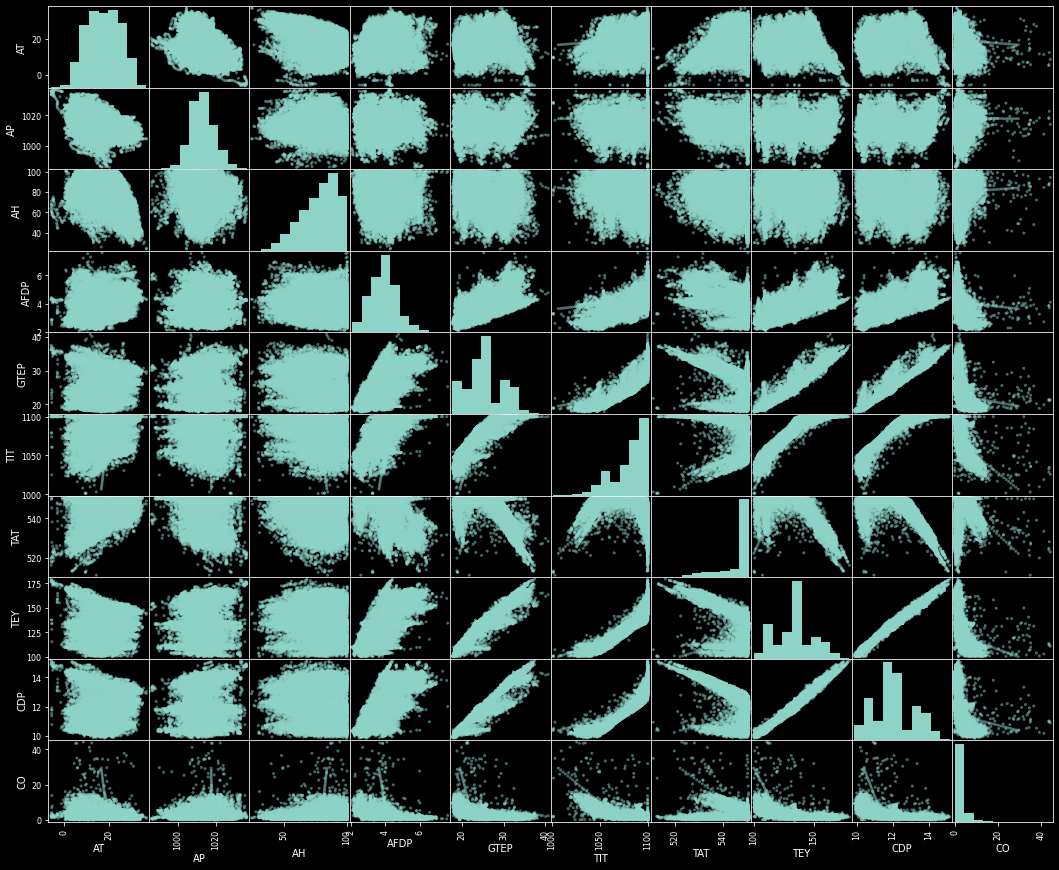

In [3]:
from pandas.plotting import scatter_matrix


scatter_matrix(df_co, figsize=(18,15));

In [4]:
df_co.describe()
df_co.corr()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO
count,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000
mean,17.712726,1013.070165,77.867015,3.925518,25.563801,1081.428084,546.158517,133.506404,12.060525,2.372468
std,7.447451,6.463346,14.461355,0.773936,4.195957,17.536373,6.842360,15.618634,1.088795,2.262672
min,-6.234800,985.850000,24.085000,2.087400,17.698000,1000.800000,511.040000,100.020000,9.851800,0.000388
25%,11.781000,1008.800000,68.188000,3.355600,23.129000,1071.800000,544.720000,124.450000,11.435000,1.182400
50%,17.801000,1012.600000,80.470000,3.937700,25.104000,1085.900000,549.880000,133.730000,11.965000,1.713500
75%,23.665000,1017.000000,89.376000,4.376900,29.061000,1097.000000,550.040000,144.080000,12.855000,2.842900
max,37.103000,1036.600000,100.200000,7.610600,40.716000,1100.900000,550.610000,179.500000,15.159000,44.103000


,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO
AT,1.000000,-0.406601,-0.476291,0.251974,0.045851,0.183706,0.281869,-0.091152,0.015287,-0.174326
AP,-0.406601,1.000000,-0.015184,-0.040363,0.057533,-0.005390,-0.225601,0.118224,0.102636,0.067050
AH,-0.476291,-0.015184,1.000000,-0.147840,-0.235153,-0.221809,0.022965,-0.137360,-0.196275,0.106586
AFDP,0.251974,-0.040363,-0.147840,1.000000,0.678485,0.691292,-0.466882,0.665483,0.702568,-0.448425
GTEP,0.045851,0.057533,-0.235153,0.678485,1.000000,0.874234,-0.699703,0.964127,0.978470,-0.518909
TIT,0.183706,-0.005390,-0.221809,0.691292,0.874234,1.000000,-0.380862,0.910297,0.908469,-0.706275
TAT,0.281869,-0.225601,0.022965,-0.466882,-0.699703,-0.380862,1.000000,-0.682396,-0.706438,0.058353
TEY,-0.091152,0.118224,-0.137360,0.665483,0.964127,0.910297,-0.682396,1.000000,0.988778,-0.569813
CDP,0.015287,0.102636,-0.196275,0.702568,0.978470,0.908469,-0.706438,0.988778,1.000000,-0.551027
CO,-0.174326,0.067050,0.106586,-0.448425,-0.518909,-0.706275,0.058353,-0.569813,-0.551027,1.000000


### Descriptive Statistics for 'NOX' 

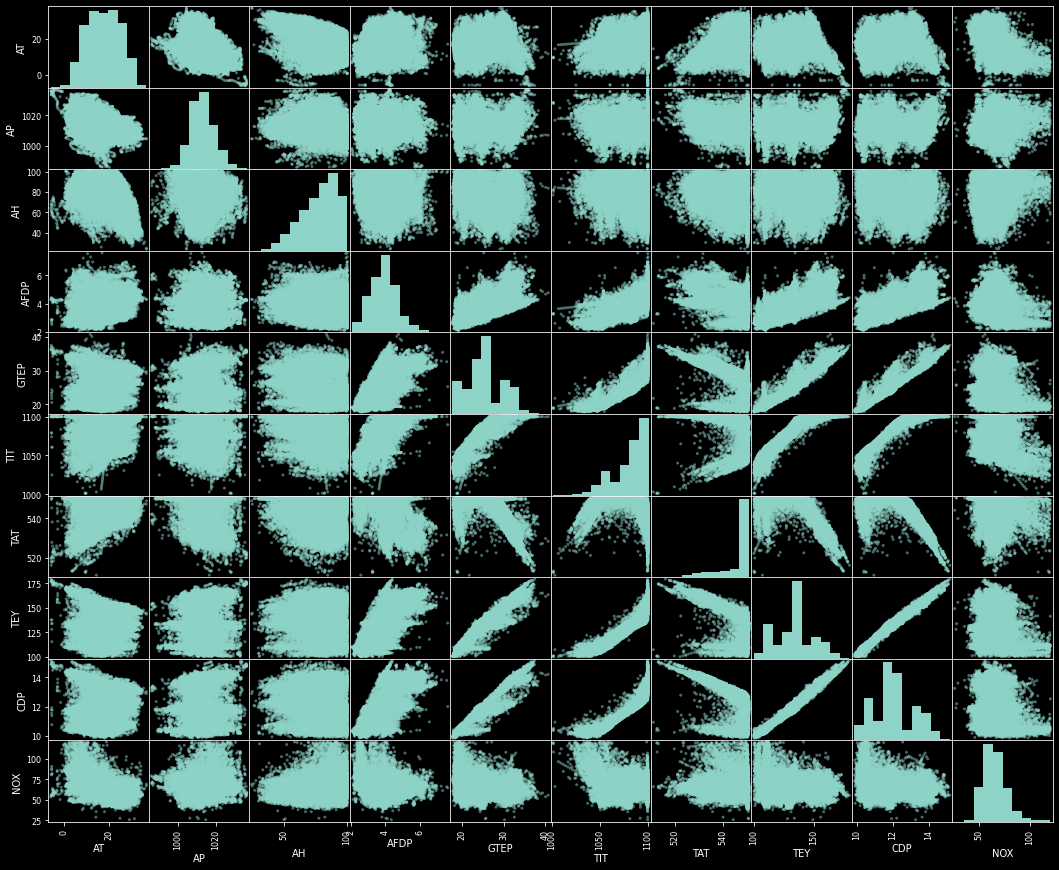

In [5]:
scatter_matrix(df_nox, figsize=(18, 15));

In [6]:
df_nox.describe()
df_nox.corr()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,NOX
count,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000
mean,17.712726,1013.070165,77.867015,3.925518,25.563801,1081.428084,546.158517,133.506404,12.060525,65.293067
std,7.447451,6.463346,14.461355,0.773936,4.195957,17.536373,6.842360,15.618634,1.088795,11.678357
min,-6.234800,985.850000,24.085000,2.087400,17.698000,1000.800000,511.040000,100.020000,9.851800,25.905000
25%,11.781000,1008.800000,68.188000,3.355600,23.129000,1071.800000,544.720000,124.450000,11.435000,57.162000
50%,17.801000,1012.600000,80.470000,3.937700,25.104000,1085.900000,549.880000,133.730000,11.965000,63.849000
75%,23.665000,1017.000000,89.376000,4.376900,29.061000,1097.000000,550.040000,144.080000,12.855000,71.548000
max,37.103000,1036.600000,100.200000,7.610600,40.716000,1100.900000,550.610000,179.500000,15.159000,119.910000


,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,NOX
AT,1.000000,-0.406601,-0.476291,0.251974,0.045851,0.183706,0.281869,-0.091152,0.015287,-0.558174
AP,-0.406601,1.000000,-0.015184,-0.040363,0.057533,-0.005390,-0.225601,0.118224,0.102636,0.191938
AH,-0.476291,-0.015184,1.000000,-0.147840,-0.235153,-0.221809,0.022965,-0.137360,-0.196275,0.164617
AFDP,0.251974,-0.040363,-0.147840,1.000000,0.678485,0.691292,-0.466882,0.665483,0.702568,-0.188247
GTEP,0.045851,0.057533,-0.235153,0.678485,1.000000,0.874234,-0.699703,0.964127,0.978470,-0.201630
TIT,0.183706,-0.005390,-0.221809,0.691292,0.874234,1.000000,-0.380862,0.910297,0.908469,-0.213865
TAT,0.281869,-0.225601,0.022965,-0.466882,-0.699703,-0.380862,1.000000,-0.682396,-0.706438,-0.092791
TEY,-0.091152,0.118224,-0.137360,0.665483,0.964127,0.910297,-0.682396,1.000000,0.988778,-0.116127
CDP,0.015287,0.102636,-0.196275,0.702568,0.978470,0.908469,-0.706438,0.988778,1.000000,-0.171256
NOX,-0.558174,0.191938,0.164617,-0.188247,-0.201630,-0.213865,-0.092791,-0.116127,-0.171256,1.000000


## Dataset Cleaning
We will eliminate datasets that are out of the range of: [Q1 - k·IQR, Q3 - k·IQR]<br />

### Determine Features with outliers

<AxesSubplot:>

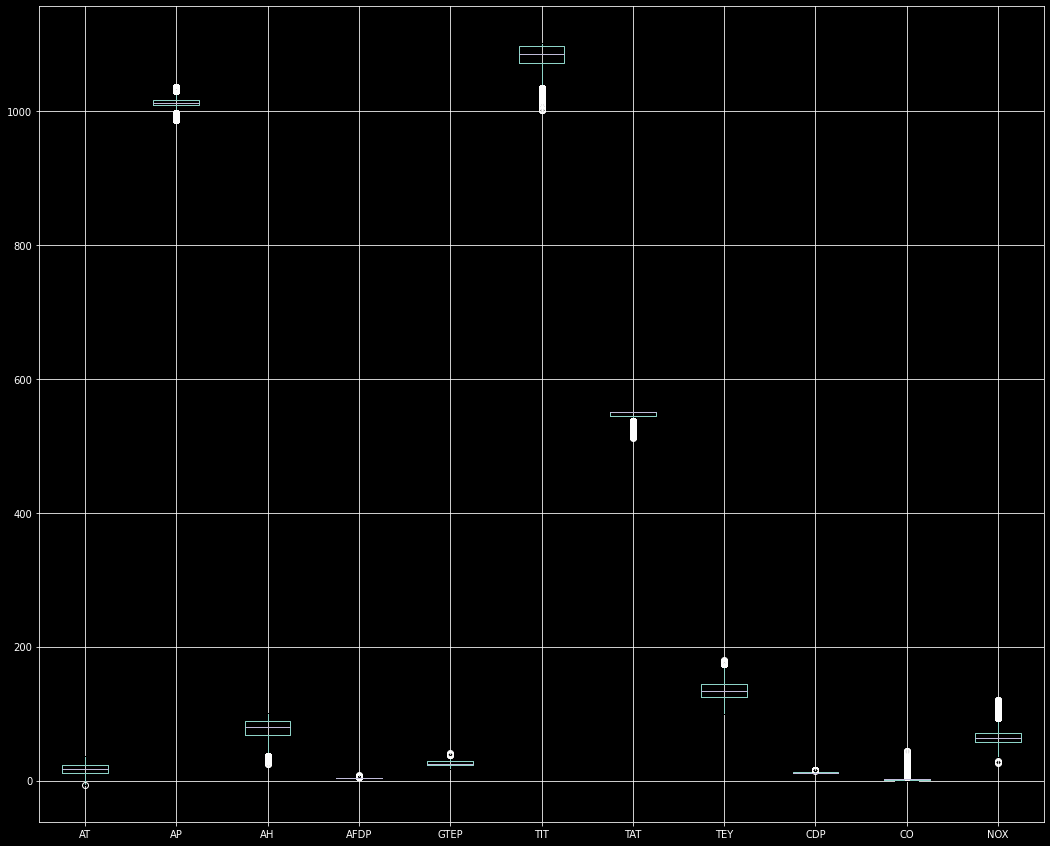

In [7]:
df_raw.boxplot(figsize=(18,15))

In [8]:
q_1 = df_raw.quantile(0.25)
q_3 = df_raw.quantile(0.75)

k_outliers = 2
IQR = q_3 - q_1

# removes datasets that are out of outliers boundary
df_clean = df_raw[~((df_raw < (q_1 - k_outliers*IQR)) |
                    (df_raw > (q_3 + k_outliers*IQR))).any(axis=1)]
df_clean.shape

# sets up the inputs and output for the models
x_raw = df_clean.drop(['CO', 'NOX'], axis=1)
y_co_raw = df_clean['CO']
y_nox_raw = df_clean['NOX']

(31107, 11)

### Feature Reduction
We will be using PCA to reduce the number of features. Raw dataset have 9 features, if we can reduce this number, we can improve compute power significantly.

StandardScaler()

PCA(n_components=7)

Text(0, 0.5, 'Percentage of Explained Variance')

Text(0.5, 0, 'Principle Component')

<BarContainer object of 7 artists>

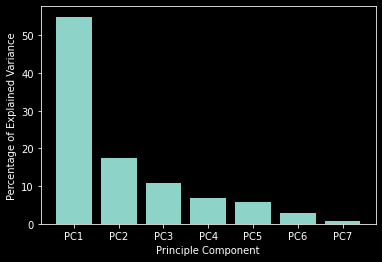

In [9]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
import numpy as np

# scale each features to similar scale, helps PCA perform better reducing features
scaler = StandardScaler()
scaler.fit(x_raw)
x_scaled = scaler.transform(x_raw)

pca = PCA(n_components=7)
pca.fit(x_scaled)

# pca_sample.explained_variance_ratio_
pca_data = pca.transform(x_scaled)
per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=3);
labels = ['PC' + str(x) for x in range(1, len(per_var) + 1)]
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principle Component')
plt.bar(x=range(1, len(per_var) + 1), height=per_var, tick_label=labels);

x_pca = pca.transform(x_raw)

# Model Developement
The output is quantitative, so we will use Multiple Linear Regression model with F-fold to determine the baseline performance metric. We will use K-fold for testing/validation to get more accurate MSE test error for our performance metrics. <br />
<br />
The four model we will be using are:<br />
Multi-Linear Regression Model<br />
Polynomial Regression Model<br />
SVR (Support Vector Regression) Model<br />
Decision Tree Regression Model<br />

In [10]:
# sets up the inputs and output for the models
y_co_raw = df_clean['CO']
y_nox_raw = df_clean['NOX']


In [14]:
import time

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# packages for 4 models we will be using
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import NuSVR
from sklearn.tree import DecisionTreeRegressor

co_model_arr = []
co_model_arr.append(('Linear Regression Model', LinearRegression()))
co_model_arr.append(('Polynomial Regression Model', LinearRegression()))
co_model_arr.append(('Support Vector Regression Model', NuSVR(kernel='rbf')))
co_model_arr.append(('Decision Tree Regression', DecisionTreeRegressor()))

# results: {"Model Name", "R^2/MSE mean", "Developed time"}
co_results_r2 = {name: [] for name, model in co_model_arr}
co_results_mse = {name: [] for name, model in co_model_arr}

poly_deg = 3
kfold = KFold(n_splits=5, shuffle=True)

for name, model in co_model_arr:
    #     polynomial Regression requires generating x_train/x_test before fitting
    if name == 'Polynomial Regression Model':
        print("\n")
        start = time.time()

        #         sets degree for poly to be 3
        poly = PolynomialFeatures(degree=poly_deg)
        x_poly = poly.fit_transform(x_pca)
        cv_score_r2 = cross_val_score(model,
                                      x_poly,
                                      y_co_raw,
                                      cv=kfold,
                                      scoring='r2')
        cv_score_mse = cross_val_score(model,
                                       x_poly,
                                       y_co_raw,
                                       cv=kfold,
                                       scoring='neg_mean_squared_error')

    elif name == 'Support Vector Regression Model':
        print("\n")
        start = time.time()

        #         SVR requires scaling the indepent variables to improve time dev. and performance
        #         'C' - penalty error term, 'nu' - upper & lower bound on the fraction of training errors
        nusvr = make_pipeline(StandardScaler(), NuSVR(C=4.5, nu=0.1))
        cv_score_r2 = cross_val_score(nusvr,
                                      x_pca,
                                      y_co_raw,
                                      cv=kfold,
                                      scoring='r2')
        cv_score_mse = cross_val_score(nusvr,
                                       x_pca,
                                       y_co_raw,
                                       cv=kfold,
                                       scoring='neg_mean_squared_error')

    elif name == 'Decision Tree Regression':
        print("\n")
        start = time.time()

        dtr_model = DecisionTreeRegressor(max_depth=10,
                                          max_leaf_nodes=90,
                                          min_weight_fraction_leaf=0.0001)
        cv_score_r2 = cross_val_score(dtr_model,
                                      x_pca,
                                      y_co_raw,
                                      cv=kfold,
                                      scoring='r2')
        cv_score_mse = cross_val_score(dtr_model,
                                       x_pca,
                                       y_co_raw,
                                       cv=kfold,
                                       scoring='neg_mean_squared_error')

    else:
        print("\n")
        start = time.time()

        cv_score_r2 = cross_val_score(model,
                                      x_pca,
                                      y_co_raw,
                                      cv=kfold,
                                      scoring='r2')
        cv_score_mse = cross_val_score(model,
                                       x_pca,
                                       y_co_raw,
                                       cv=kfold,
                                       scoring='neg_mean_squared_error')

    co_results_r2[name].append(cv_score_r2.mean())
    co_results_mse[name].append(abs(cv_score_mse.mean()))
    co_results_r2[name].append(round(time.time() - start, 4))

    print("%s:    R^2 (mean): %f,    MSE (mean): %f" %
          (name, cv_score_r2.mean(), abs(cv_score_mse.mean())))
    print("time run: %.4f sec" % (time.time() - start))



Linear Regression Model:    R^2 (mean): 0.587063,    MSE (mean): 0.675340
time run: 0.0873 sec


Polynomial Regression Model:    R^2 (mean): 0.690177,    MSE (mean): 0.506505
time run: 2.8624 sec


Support Vector Regression Model:    R^2 (mean): 0.671010,    MSE (mean): 0.537438
time run: 109.2420 sec


Decision Tree Regression:    R^2 (mean): 0.657748,    MSE (mean): 0.566620
time run: 1.2566 sec


In [12]:
nox_model_arr = []
nox_model_arr.append(('Linear Regression Model', LinearRegression()))
nox_model_arr.append(('Polynomial Regression Model', LinearRegression()))
nox_model_arr.append(('Support Vector Regression Model', NuSVR(kernel='rbf')))
nox_model_arr.append(('Decision Tree Regression', DecisionTreeRegressor()))

# results: {"Model Name", "MSE mean value", "Developed time"}
nox_results_r2 = {name: [] for name, model in nox_model_arr}
nox_results_mse = {name: [] for name, model in nox_model_arr}

poly_deg = 3
kfold = KFold(n_splits=5, shuffle=True)

for name, model in co_model_arr:
    #     polynomial Regression requires generating x_train/x_test before fitting
    if name == 'Polynomial Regression Model':
        print("\n")
        start = time.time()

        #         sets degree for poly to be 3
        poly = PolynomialFeatures(degree=poly_deg)
        x_poly = poly.fit_transform(x_pca)
        cv_score_r2 = cross_val_score(model, x_poly, y_nox_raw, cv=kfold, scoring='r2')
        cv_score_mse = cross_val_score(model, x_poly, y_nox_raw, cv=kfold, scoring='neg_mean_squared_error')

    elif name == 'Support Vector Regression Model':
        print("\n")
        start = time.time()

        #         SVR requires scaling the indepent variables to improve time dev. and performance
        #         'C' - penalty error term, 'nu' - upper & lower bound on the fraction of training errors
        nusvr = make_pipeline(StandardScaler(), NuSVR(C=4.5, nu=0.1))
        cv_score_r2 = cross_val_score(nusvr, x_pca, y_nox_raw, cv=kfold, scoring='r2')
        cv_score_mse = cross_val_score(nusvr, x_pca, y_nox_raw, cv=kfold, scoring='neg_mean_squared_error')

    elif name == 'Decision Tree Regression':
        print("\n")
        start = time.time()

        dtr_model = DecisionTreeRegressor(max_depth=10,
                                          max_leaf_nodes=90,
                                          min_weight_fraction_leaf=0.0001)
        cv_score_r2 = cross_val_score(dtr_model, x_pca, y_nox_raw, cv=kfold, scoring='r2')
        cv_score_mse = cross_val_score(dtr_model, x_pca, y_nox_raw, cv=kfold, scoring='neg_mean_squared_error')

    else:
        print("\n")
        start = time.time()

        cv_score_r2 = cross_val_score(model, x_pca, y_nox_raw, cv=kfold, scoring='r2')
        cv_score_mse = cross_val_score(model, x_pca, y_nox_raw, cv=kfold, scoring='neg_mean_squared_error')

    nox_results_r2[name].append(cv_score_r2.mean())
    nox_results_mse[name].append(abs(cv_score_mse.mean()))

    print("%s:    R^2 (mean): %f,    MSE (mean): %f" % (name, cv_score_r2.mean(), abs(cv_score_mse.mean())))
    print("time run: %.4f sec" % (time.time() - start))



Linear Regression Model:    R^2 (mean): 0.584015,    MSE (mean): 41.757613
time run: 0.1073 sec


Polynomial Regression Model:    R^2 (mean): 0.764134,    MSE (mean): 23.647324
time run: 2.8801 sec


Support Vector Regression Model:    R^2 (mean): 0.696576,    MSE (mean): 30.500638
time run: 86.2142 sec


Decision Tree Regression:    R^2 (mean): 0.588453,    MSE (mean): 40.876514
time run: 1.4985 sec
